# Study Johns Hopkins COVID-19 Data
## Dane Taylor, September 10, 2020


In [1]:
%pylab inline
import requests
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Download most recent COVID-19 Case Data from https://github.com/CSSEGISandData/COVID-19. 
See also https://coronavirus.jhu.edu/map.html. 
 

In [2]:
def download_current_data(filenames):
    """
    Download the Johns Hopkins data that contains all cases for all counties for all dates.

    Args:
        the filenames for the confirmed case dataset and the deaths datasets.

    Returns:
        County_Names: A list of strings containing the county names
        counts: A 2D numpy array in which entry (i,t) gives the cumulative number of COVID cases in county i up to day t
                The first day is Jan. 22, 2020
                The last day is Sep. 9, 2020
    """
    
    COVID_case_types = ['confirmed','deaths']

    urls = {'confirmed':'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',
            'deaths':'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
           }
    
    for COVID_case_type in COVID_case_types:
        r = requests.get(urls[COVID_case_type], allow_redirects=True)
        open(filenames[COVID_case_type], 'wb').write(r.content)


In [3]:
# Download both the confirmed cases and deaths
filenames = {'confirmed':'time_series_covid19_confirmed_US_NEW.csv',
                 'deaths':'time_series_covid19_deaths_US_NEW.csv'}

In [4]:
# Change redownload_data to False if you don't want to redownload over and over.
redownload_data = False
if redownload_data:
    download_current_data(filenames)

### We will only study confirmed cases, not deaths here

In [5]:
df = pd.read_csv(filenames['confirmed'])
df = df.set_index('Combined_Key') #df.loc[0] # show the data frame
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1348,1354,1345,1349,1355,1371,1377,1383,1385,1398
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4422,4445,4458,4495,4513,4542,4569,4586,4609,4639
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,628,629,617,614,616,616,616,617,617,618
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,535,538,541,542,545,550,555,557,562,564
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1034,1045,1036,1037,1049,1062,1065,1070,1071,1082


# Note that the counties have FIPS codes, but I didn't use that

In [6]:
def get_state_county_data(Province_State,df):
    """
    For a given state, extract the counts into a 2D numpy array.

    Args:
        Province_State (string): A name of a state or province. (e.g., 'New York')
        df: A pandas dataframe that contains the COVID data

    Returns:
        county_names: A list of strings containing the county names
        county_counts: A 2D numpy array in which entry (i,t) gives the number of COVID cases in county i UP TO day t
                The first day is Jan. 22, 2020
                The last day is Sep. 9, 2020
    """
    
    County_Data = df.loc[df['Province_State'] == Province_State]
    cols_to_delete = ['UID', 'iso2','iso3','code3','FIPS','Admin2','Province_State','Country_Region','Lat','Long_']
    County_Data = County_Data.drop(columns=cols_to_delete)
    county_names = County_Data.index
    county_names = [ name.split(',')[0] for name in county_names]
    county_counts = County_Data.to_numpy()
    return county_names,county_counts

### Study cases in NY State for example

In [7]:
Province_State = 'New York'
county_names,county_counts = get_state_county_data(Province_State,df);
print(county_names)

['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga', 'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia', 'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin', 'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson', 'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery', 'Nassau', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego', 'Out of NY', 'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca', 'St. Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Unassigned', 'Warren', 'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates']


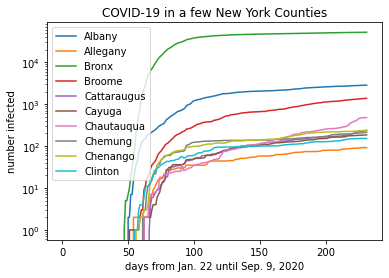

In [8]:
plt.semilogy(county_counts[:10].T)
plt.xlabel('days from Jan. 22 until Sep. 9, 2020')
plt.ylabel('number infected');    
plt.title('COVID-19 in a few New York Counties');
plt.legend(county_names[:10]);

Note that the data is the cumulative counts. We can get the new daily counts by:

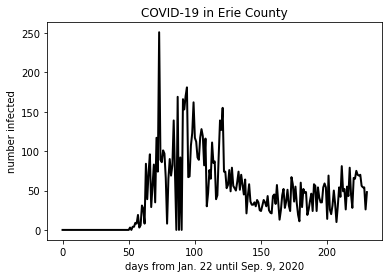

In [9]:
daily_NY_county_cases = county_counts[:,1:]-county_counts[:,0:-1]
Erie_county = 14    
plt.plot(daily_NY_county_cases[Erie_county],'k',linewidth=2);
plt.xlabel('days from Jan. 22 until Sep. 9, 2020')
plt.ylabel('number infected');    
plt.title('COVID-19 in Erie County');

## Let's aggregate across the states, focusing on the 50 states

In [10]:
def get_counts_for_a_state_(Province_State,df):
    """
    For a given state, extract its daily counts into a numpy array.

    Args:
        Province_State (string): A name of a state or province. (e.g., 'New York')
        df: A pandas dataframe that contains the COVID data

    Returns:
        state_counts: A 1D numpy array in which entry t gives the cumulative number of COVID cases in that state up to day t 
                The first day is Jan. 22, 2020
                The last day is Sep. 9, 2020
    """
    county_names,county_counts = get_state_county_data(Province_State,df);
    state_counts = np.sum(county_counts,0)
    return state_counts

In [11]:
def get_list_of_50states(df):
    state_names = list(unique(df['Province_State']))
    state_names.remove('American Samoa')
    state_names.remove('Diamond Princess')
    state_names.remove('District of Columbia')
    state_names.remove('Guam')
    state_names.remove('Virgin Islands')
    state_names.remove('Northern Mariana Islands')
    state_names.remove('Grand Princess')
    state_names.remove('Puerto Rico')
    return state_names
state_names = get_list_of_50states(df)
print(state_names)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [14]:
def get_counts_all_states(df,state_names):
    _,county_counts = get_state_county_data('New York',df);
    total_days = shape(county_counts)[1]
    state_counts = np.zeros((len(state_names),total_days))
    for t,Province_State in enumerate(state_names):
        state_counts[t,:] = get_counts_for_a_state_(Province_State,df)
    
    return state_counts

In [15]:
state_counts = get_counts_all_states(df,state_names)

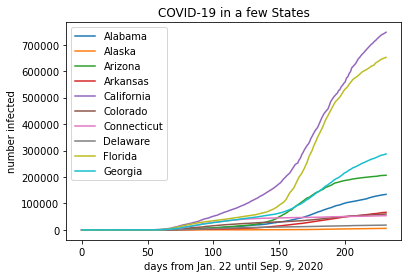

In [16]:
plt.plot(state_counts[:10].T)
plt.xlabel('days from Jan. 22 until Sep. 9, 2020')
plt.ylabel('number infected');    
plt.title('COVID-19 in a few States');
plt.legend(state_names[:10])

In [17]:
shape(state_counts)

(50, 232)